In [2]:
import numpy as np
import pandas as pd

In [3]:
housing= pd.read_csv("train (1).csv")

In [1]:
#print(housing.to_string())

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = housing.isna().mean() * 100

# Filter columns with missing values
missing_columns = missing_percentage[missing_percentage > 0]

# Output the filtered columns and the count of them
missing_columns, len(missing_columns)


(LotFrontage     17.739726
 Alley           93.767123
 MasVnrType      59.726027
 MasVnrArea       0.547945
 BsmtQual         2.534247
 BsmtCond         2.534247
 BsmtExposure     2.602740
 BsmtFinType1     2.534247
 BsmtFinType2     2.602740
 Electrical       0.068493
 FireplaceQu     47.260274
 GarageType       5.547945
 GarageYrBlt      5.547945
 GarageFinish     5.547945
 GarageQual       5.547945
 GarageCond       5.547945
 PoolQC          99.520548
 Fence           80.753425
 MiscFeature     96.301370
 dtype: float64,
 19)

In [11]:
# Forward fill missing values for object-type columns with missing data
housing.loc[:, missing_columns.reset_index()['index']].select_dtypes(include=['object']).ffill()

# Backward fill missing values for object-type columns with missing data
housing.loc[:, missing_columns.reset_index()['index']].select_dtypes(include=['object']).bfill()


,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
1,Grvl,BrkFace,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
2,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
3,Grvl,BrkFace,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Ex,MnPrv,Shed
4,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Stone,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,MnPrv,Shed
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,Shed
1457,NaN,NaN,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,NaN,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [12]:
# Count the missing values in each column
missing_values = housing.isna().sum()

# Output the missing values count for each column
print(missing_values)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [13]:
# Calculate the mean of float64-type columns with missing data
housing.loc[:, missing_columns.reset_index()['index']].select_dtypes(include=['float64']).mean(axis=0)


LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [14]:
# Impute missing values in 'LotFrontage' with a default value of 70.04
housing['LotFrontage'] = np.where(housing['LotFrontage'].isna(), 70.04, housing['LotFrontage'])

# Impute missing values in 'MasVnrArea' with a default value of 103.685262
housing['MasVnrArea'] = np.where(housing['MasVnrArea'].isna(), 103.685262, housing['MasVnrArea'])

# Impute missing values in 'GarageYrBlt' with a default value of 1978.506164
housing['GarageYrBlt'] = np.where(housing['GarageYrBlt'].isna(), 1978.506164, housing['GarageYrBlt'])


In [15]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
# Count the missing values in each column
missing_values = housing.isna().sum()

# Drop columns with more than 50% missing values
housing.drop(missing_values[missing_values > 50].reset_index()['index'], axis=1, inplace=True)

# Output the shape of the dataframe after column removal
housing.shape


(1460, 71)

## Converting cat cols into numerical cols

In [17]:
# Get the column names with 'object' data type (categorical columns)
df_cat=housing.select_dtypes(include=['object']).columns

In [18]:
df_cat

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
# Importing necessary libraries for preprocessing and metrics
from sklearn import preprocessing, metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [22]:
# Initialize the OneHotEncoder for categorical data encoding
ohe = OneHotEncoder()


In [23]:
# Reset the index of the DataFrame without keeping the old index
housing.reset_index(drop=True, inplace=True)

# List of categorical columns in the housing dataset
df_cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
               'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
               'SaleCondition']


In [24]:
# Apply OneHotEncoder to the categorical columns in housing dataset
ohe_var = ohe.fit_transform(housing[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                                     'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                                     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                     'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                                     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                                     'PavedDrive', 'SaleType', 'SaleCondition']])


In [25]:
# Convert the OneHotEncoded array into a DataFrame with appropriate column names
ohe_var = pd.DataFrame(ohe_var.toarray(), columns=ohe.get_feature_names_out(['MSZoning', 'Street', 'LotShape', 'LandContour', 
                                                                              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                                                                              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                                                                              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                                              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                                                                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                                                              'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                                                                              'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 
                                                                              'SaleCondition']))


In [26]:
# Concatenate the original housing DataFrame with the OneHotEncoded columns
housing_new = pd.concat([housing, ohe_var], axis=1)


In [2]:
#housing_new

In [28]:
# Drop the original categorical columns after OneHotEncoding
housing_new.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                          'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                          'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                          'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                          'PavedDrive', 'SaleType', 'SaleCondition'], inplace=True)


In [3]:
#housing_new

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term to the DataFrame to account for the intercept in VIF calculation
df_constant = add_constant(housing_new)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = df_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_constant.values, i) for i in range(df_constant.shape[1])]

# Display the VIF values for each feature
print(vif_data)



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   Feature        VIF
0                    const   0.000000
1                       Id   1.192539
2               MSSubClass  33.805402
3              LotFrontage   2.505810
4                  LotArea   3.417143
..                     ...        ...
251  SaleCondition_AdjLand        inf
252   SaleCondition_Alloca        inf
253   SaleCondition_Family        inf
254   SaleCondition_Normal        inf
255  SaleCondition_Partial        inf

[256 rows x 2 columns]


In [37]:
# Select columns with VIF values greater than or equal to 20
reqcols = vif_data.loc[vif_data['VIF'] >= 20, 'Feature']

# Access the corresponding columns in the housing_new DataFrame
housing_new.loc[:, reqcols]


,MSSubClass,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MSZoning_C (all),...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,706,0,150,856,856,854,0,1710,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,978,0,284,1262,1262,0,0,1262,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,486,0,434,920,920,866,0,1786,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,216,0,540,756,961,756,0,1717,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,655,0,490,1145,1145,1053,0,2198,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,0,953,953,953,694,0,1647,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,790,163,589,1542,2073,0,0,2073,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,275,0,877,1152,1188,1152,0,2340,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,49,1029,0,1078,1078,0,0,1078,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
def correlation(df, threshold):
    correlated_cols = set()
    corre_matrix = df.corr()
    for i in range(len(corre_matrix.columns)):
        for j in range(i):
            if abs(corre_matrix.iloc[i, j]) > threshold:
                correlated_cols.add(corre_matrix.columns[i])
    return correlated_cols


In [39]:
# Function to remove highly correlated features (multicollinearity)
def remove_multicollinearity(df, threshold):
    correlated_cols = correlation(df, threshold)
    
    # Drop highly correlated columns
    df_cleaned = df.drop(columns=correlated_cols)
    
    return df_cleaned

# Apply the function with a threshold (e.g., 0.9 for high correlation)
threshold = 0.9
housing_cleaned = remove_multicollinearity(housing_new, threshold)

# Check the shape of the new DataFrame after removing correlated features
print(housing_cleaned.shape)


(1460, 239)


In [40]:
# Remove multicollinearity using correlation before training the model
threshold = 0.9
housing_cleaned = remove_multicollinearity(housing_new, threshold)

# Now, split the data into training and test sets
X = housing_cleaned.loc[:, housing_cleaned.columns != 'SalePrice'].values
y = housing_cleaned.loc[:, housing_cleaned.columns == 'SalePrice'].values

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 22259.56716756969
Mean Squared Error: 3096707469.952557
Root Mean Squared Error: 55648.067980412015
R² Score: 0.5515819940928334


In [42]:
# Predict on the training set
y_train_pred = regressor.predict(X_train)

# Compare training vs test performance
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

# Print comparison
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training R²:", train_r2)
print("Test R²:", test_r2)


Training MAE: 12548.10328137777
Test MAE: 22259.56716756969
Training R²: 0.94058573886167
Test R²: 0.5515819940928334


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Ridge regression (example)
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Tuning the regularization parameter
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best alpha:", grid_search.best_params_)

# Train and evaluate with the best model
best_ridge = grid_search.best_estimator_
y_pred_best = best_ridge.predict(X_test)
print("Best Model R²:", r2_score(y_test, y_pred_best))


Best alpha: {'alpha': 10}
Best Model R²: 0.7093565606475368


In [44]:
#adjusted R2
# Function to compute adjusted R²
def adjusted_r2_score(X, y, model):
    n = len(y)  # Number of observations
    p = X.shape[1]  # Number of features
    r2 = r2_score(y, model.predict(X))  # R² Score
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# Calculate Adjusted R² for both models
train_adj_r2 = adjusted_r2_score(X_train, y_train, regressor)
test_adj_r2 = adjusted_r2_score(X_test, y_test, regressor)

print("Training Adjusted R²:", train_adj_r2)
print("Test Adjusted R²:", test_adj_r2)


Training Adjusted R²: 0.9253644319177274
Test Adjusted R²: -1.4620686739431226


In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)  # You can start with alpha=10, but we can tune it further
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("R² (Ridge):", r2_score(y_test, y_pred_ridge))


R² (Ridge): 0.7093565606475368


In [46]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge on scaled data
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge.predict(X_test_scaled)
print("R² (Ridge with Scaling):", r2_score(y_test, y_pred_ridge_scaled))


R² (Ridge with Scaling): 0.5878693901662428


In [47]:
from sklearn.model_selection import cross_val_score

# Use Ridge with cross-validation
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE (negative): {cv_scores}")


Cross-Validation MSE (negative): [-7.23414763e+08 -1.48384541e+09 -5.58768417e+08 -8.23647330e+08
 -4.14967786e+08]


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'alpha': 100}


In [49]:
# Train with the best alpha found from GridSearchCV
best_ridge = Ridge(alpha=100)
best_ridge.fit(X_train_scaled, y_train)
y_pred_best_ridge = best_ridge.predict(X_test_scaled)

print("R² (Ridge with alpha=100):", r2_score(y_test, y_pred_best_ridge))


R² (Ridge with alpha=100): 0.6307215979489333


In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("R² (Lasso with alpha=100):", r2_score(y_test, y_pred_lasso))


R² (Lasso with alpha=100): 0.5968935100449475


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the trained Random Forest model
y_pred = rf_model.predict(X_train)

# Evaluate performance
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (Coefficient of Determination): {r2}")


Mean Squared Error (MSE): 127450989.59156996
Mean Absolute Error (MAE): 6522.615590753425
R² (Coefficient of Determination): 0.97929968918002


In [59]:
# Predicting on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluating the model performance on the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse_test = mean_squared_error(y_test, y_test_pred)
# Mean Absolute Error
mae_test = mean_absolute_error(y_test, y_test_pred)
# R²
r2_test = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error (MSE):", mse_test)
print("Test Mean Absolute Error (MAE):", mae_test)
print("Test R²:", r2_test)


Test Mean Squared Error (MSE): 1196368366.8795376
Test Mean Absolute Error (MAE): 17709.577739726028
Test R²: 0.8267601565172202


In [60]:
def adjusted_r2(R2, n, p):
    return 1 - (1 - R2) * (n - 1) / (n - p - 1)

# Calculate Adjusted R² for the training set
n_train = X_train.shape[0]  # Number of samples in the training set
p_train = X_train.shape[1]  # Number of features in the training set
adj_r2_train = adjusted_r2(rf_model.score(X_train, y_train), n_train, p_train)

# Calculate Adjusted R² for the test set
n_test = X_test.shape[0]  # Number of samples in the test set
p_test = X_test.shape[1]  # Number of features in the test set
adj_r2_test = adjusted_r2(rf_model.score(X_test, y_test), n_test, p_test)

# Display the Adjusted R² values
print("Adjusted R² (Train):", adj_r2_train)
print("Adjusted R² (Test):", adj_r2_test)


Adjusted R² (Train): 0.973996487915052
Adjusted R² (Test): 0.048815198990775244


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Scale the train data
X_test_scaled = scaler.transform(X_test)  # Use the same scaling for test data


In [62]:
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the scaled data
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")


Original number of features: 238
Reduced number of features after PCA: 153


In [63]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Evaluate the model
train_pred_pca = rf_pca.predict(X_train_pca)
test_pred_pca = rf_pca.predict(X_test_pca)

# Calculate the performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train metrics
train_mse = mean_squared_error(y_train, train_pred_pca)
train_mae = mean_absolute_error(y_train, train_pred_pca)
train_r2 = r2_score(y_train, train_pred_pca)

# Test metrics
test_mse = mean_squared_error(y_test, test_pred_pca)
test_mae = mean_absolute_error(y_test, test_pred_pca)
test_r2 = r2_score(y_test, test_pred_pca)

# Print results
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train R²: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 135271553.29757774
Train MAE: 7101.626917808219
Train R²: 0.9780294903371503
Test MSE: 1520675043.5950634
Test MAE: 20648.582226027396
Test R²: 0.7797990035228807


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_test_pred = best_rf_model.predict(X_test)

# Print best parameters and evaluation metrics
print("Best parameters:", best_params)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 1115900026.6556997
Test MAE: 17525.504969436388
Test R²: 0.8384123558327681


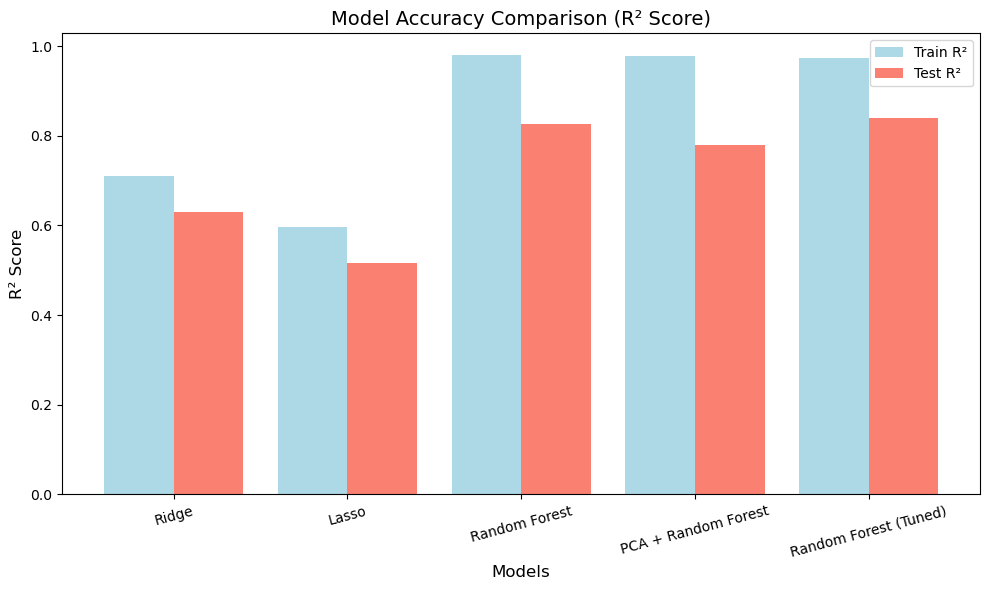

In [4]:
import matplotlib.pyplot as plt

# Define models and their R² scores (replace these values with actual results)
models = ['Ridge', 'Lasso', 'Random Forest', 'PCA + Random Forest', 'Random Forest (Tuned)']
train_r2_scores = [0.7094, 0.5969, 0.9793, 0.9780, 0.9740]  # Add Train R² here
test_r2_scores = [0.6307, 0.5169, 0.8268, 0.7798, 0.8384]   # Add Test R² here

# Create bar width and positions
x_pos = range(len(models))
width = 0.4

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x=[p - width/2 for p in x_pos], height=train_r2_scores, width=width, label='Train R²', color='lightblue')
plt.bar(x=[p + width/2 for p in x_pos], height=test_r2_scores, width=width, label='Test R²', color='salmon')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Model Accuracy Comparison (R² Score)', fontsize=14)
plt.xticks(x_pos, models, rotation=15)
plt.legend()
plt.tight_layout()

# Show Plot
plt.show()
